<a href="https://colab.research.google.com/github/pelegharel/robotics-final/blob/master/wall_trace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Only run on google collab

In [1]:
!rm -rf robotics-final
!git clone https://github.com/pelegharel/robotics-final.git

Cloning into 'robotics-final'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), done.


In [0]:
import numpy as np
from numpy.linalg import norm
from matplotlib import pyplot as plt
from ipywidgets import interact
from ipywidgets import widgets
from IPython.display import display

import cv2

In [0]:
def unit_vector(vector):
  return vector / norm(vector)

def unit_vectors(vectors):
    """ Returns the unit vector of the vector.  """
    return vectors / norm(vectors, axis=1).reshape(-1, 1)

def angles2vecs(robot_rotation, point_vectors):
    v1 = unit_vector(robot_rotation)
    v2s = unit_vectors(point_vectors)
    cosines = v2s @ v1.reshape(2, 1)
    sinuses = np.column_stack((-v2s[:,1], v2s[:,0])) @ v1.reshape(2, 1)
    return np.arctan2(sinuses, cosines)
  
def calc_right_points(occ_points, robot_pos, robot_rotation):
  vectors = occ_points - robot_pos
  angles = angles2vecs(robot_rotation, vectors)
  return occ_points[np.where(angles > 0)[0]]
  
def closest_point(robot_pos, right_points):
  norms = norm(robot_pos - right_points, axis=1)
  return right_points[np.argmin(norms)]

In [0]:
def plot_state(world_map,
               points_of_right,
               min_right_point,
               robot_pos,
               robot_rotation):
  """
  Plots the map of the world and deduced properties
  """
  plt.imshow(world_map)
  plt.scatter(points_of_right[:,1],
              points_of_right[:,0],
              color='green')
  
  plt.scatter(*min_right_point[::-1], color='blue')  
  plt.scatter(*robot_pos[::-1], color='red')
  plt.arrow(robot_pos[1], robot_pos[0],
            3 * robot_rotation[1],
            3 * robot_rotation[0],
            color='red')

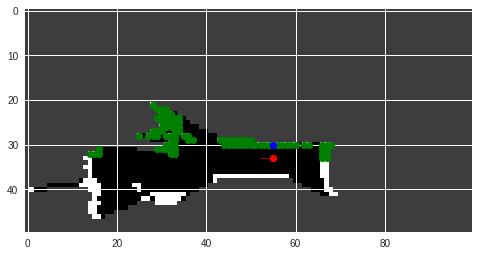

In [28]:
CAVANT = 254
UKNOWN = 205
OCCUPIED = 0

wm = cv2.imread("robotics-final/map.pgm")[150:200, 150:250, 1]
robot_pos = (33, 55)

robot_rotation = (0, -1)

points_of_right = calc_right_points(occ_points=np.argwhere(wm == OCCUPIED),
                                       robot_pos=robot_pos,
                                       robot_rotation=robot_rotation)
plot_state(wm,
           points_of_right=points_of_right,
           min_right_point=closest_point(robot_pos, points_of_right),
           robot_pos=robot_pos,
           robot_rotation=robot_rotation)